# Project: Wrangling and Analyze Data

## Data Gathering


In [1]:
import pandas as pd
import json
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r=requests.get(url).content

In [4]:
df_image = pd.read_csv(io.StringIO(r.decode("utf-8")) , "\t")
df_image.head(3)                

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#this is a sample code to retrieve the required data from twitter api using tweepy

import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


#Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    data = []
   
    for line in lines:
        data.append(json.loads(line))
        
        
df_tweets = pd.DataFrame(data)

In [6]:
columns = ['id', 'favorite_count', 'retweet_count']

df_tweets = df_tweets[columns]
df_tweets.head()



,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_archive[df_archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


Drop the retweets

In [10]:
df_archive_tweets = df_archive[df_archive.retweeted_status_id.isnull()]
df_archive_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [11]:
df_archive_tweets[df_archive_tweets.in_reply_to_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [12]:
df_archive_tweets["tweet_id"].duplicated().unique()

array([False], dtype=bool)

In [13]:
df_archive_tweets["rating_denominator"].where(lambda x:x<10).unique()

array([ nan,   0.,   7.,   2.])

In [14]:
df_archive_tweets[df_archive_tweets["rating_denominator"]==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [15]:
df_archive_tweets["rating_numerator"].where(lambda x:x<10).unique()
df_archive_tweets[df_archive_tweets["rating_numerator"]==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [16]:
df_archive_tweets["rating_numerator"].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,  182,
         15,  960,    0,    7,   84,   24,   75,   27,    3,    8,    9,
          4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,    1,
        143,  121,   20,   26,    2,  144,   88])

In [17]:
df_image.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1892,849336543269576704,https://pbs.twimg.com/media/C8lzFC4XcAAQxB4.jpg,1,patio,0.521788,False,prison,0.149544,False,restaurant,0.027153,False
1581,796484825502875648,https://pbs.twimg.com/media/Cw2uty8VQAAB0pL.jpg,1,cocker_spaniel,0.116924,True,seat_belt,0.107511,False,Australian_terrier,0.099843,True
1665,812503143955202048,https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg,2,loupe,0.546856,False,web_site,0.345298,False,bubble,0.010528,False
1401,768855141948723200,https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg,1,chow,0.720219,True,Brabancon_griffon,0.058365,True,Rottweiler,0.055114,True
1054,714251586676113411,https://pbs.twimg.com/media/CemIBt4WwAQqhVV.jpg,2,soft-coated_wheaten_terrier,0.751962,True,Bedlington_terrier,0.175652,True,Great_Pyrenees,0.011452,True
911,700796979434098688,https://pbs.twimg.com/media/Cbm7IeUXIAA6Lc-.jpg,1,tailed_frog,0.652712,False,tree_frog,0.280212,False,bullfrog,0.040177,False
2047,886736880519319552,https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg,1,kuvasz,0.309706,True,Great_Pyrenees,0.186136,True,Dandie_Dinmont,0.086346,True
484,675483430902214656,https://pbs.twimg.com/media/CV_MmGZU8AAggM6.jpg,1,box_turtle,0.543706,False,terrapin,0.202600,False,loggerhead,0.071122,False
1128,727685679342333952,https://pbs.twimg.com/media/ChlCQg-VIAQ_8g4.jpg,1,Border_collie,0.462408,True,collie,0.214556,True,Eskimo_dog,0.035604,True
1993,874012996292530176,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674,True,Pembroke,0.116622,True,kelpie,0.049182,True


#drop rows if the isn't a dog
df_image_dog= df_image[(df_image.p1_dog== True)]
#this includes only images which have been recognised as a dog with the highest confidence
df_image_dog.info()

In [18]:
df_image['p1_conf'].min()
df_image['p1_conf'].max()

1.0

In [19]:
df_archive_tweets[df_archive_tweets.rating_numerator== 1776].text

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object

In [20]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
df_tweets['favorite_count'].min()

0

In [22]:
df_tweets['retweet_count'].min()

0

In [23]:
column_list = list(df_archive_tweets)+ list(df_tweets) + list(df_image)
pd.Series(column_list)[pd.Series(column_list).duplicated()]

20    tweet_id
dtype: object

### Quality issues
df_archive_tweets
1. table contained retweeted tweets 

2. retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are not useful and should be dropped        
 
3. some decimal ratings have been incorrectly extracted

4. some ratings are not correct

5. some ratings are inconsistent

6. timestamp should be a datetime object

7. some tweets do not contain ratings 

8. some rows have rating numerator as 0

### Tidiness issues
1. doggo, floofer, pupper and puppo have been separated into different columns 

2. all 3 datasets should be merged into one master dataset and all duplicate columns be dropped

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
df_archive_tweets_copy= df_archive_tweets.copy()
df_image_copy= df_image.copy()
df_tweets_copy= df_tweets.copy()

### Issue #1:

Drop the retweets: This has already been done to make the wrangling efforts faster. Below is the code used

df_archive_tweets = df_archive[df_archive.retweeted_status_id.isnull()]
df_archive_tweets.info()

### Issue #2:

#### Define: drop the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp 

#### Code and test

In [25]:
df_archive_tweets.drop(columns=["retweeted_status_id", "retweeted_status_user_id",  "retweeted_status_timestamp"], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Issue #3:

#### Define: find and change incorrectly extracted decimal ratings (correct but aren't rated over 10) 

#### Code and test

In [26]:
pd.set_option('display.max_colwidth', -1)

In [27]:
ratings = df_archive_tweets.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [28]:
ratings[0].sample(10)

1543    12
1485    12
1758    10
138     13
2223    9 
2355    8 
300     12
2014    9 
897     11
1330    11
Name: 0, dtype: object

In [29]:
df_archive_tweets.rating_numerator = ratings[0]

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [30]:
df_archive_tweets.rating_numerator=df_archive_tweets.rating_numerator.astype('float64')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [31]:
df_archive_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 254.9+ KB


### Issue #4:

#### Define: find and correct incorrect ratings

#### Code and test

In [32]:
df_archive_tweets[df_archive_tweets["rating_denominator"]!=10].text

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second e

In [33]:
df_archive_tweets.loc[313,['rating_numerator', 'rating_denominator']]= [13,10]
df_archive_tweets.loc[1068,['rating_numerator', 'rating_denominator']]= [14,10]
df_archive_tweets.loc[1165,['rating_numerator', 'rating_denominator']]= [13,10]
df_archive_tweets.loc[1202,['rating_numerator', 'rating_denominator']]= [11,10]
df_archive_tweets.loc[1662,['rating_numerator', 'rating_denominator']]= [10,10]
df_archive_tweets.loc[2335,['rating_numerator', 'rating_denominator']]= [9,10]

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Issue #5:

#### Define: find and change inconsistent ratings (correct but aren't rated over 10) 

#### Code and test

In [34]:
df_archive_tweets[df_archive_tweets["rating_denominator"]!=10].text

342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                                                
1228    Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1         

In [35]:
#since it's a ratio, the values can be converted to value/10 and still be valid 
df_archive_tweets.loc[433,['rating_numerator', 'rating_denominator']]= [12,10]
df_archive_tweets.loc[902,['rating_numerator', 'rating_denominator']]= [11,10]
df_archive_tweets.loc[1120,['rating_numerator', 'rating_denominator']]= [12,10]
df_archive_tweets.loc[1228,['rating_numerator', 'rating_denominator']]= [11,10]
df_archive_tweets.loc[1254,['rating_numerator', 'rating_denominator']]= [10,10]
df_archive_tweets.loc[1274,['rating_numerator', 'rating_denominator']]= [9,10]
df_archive_tweets.loc[1351,['rating_numerator', 'rating_denominator']]= [12,10]
df_archive_tweets.loc[1433,['rating_numerator', 'rating_denominator']]= [11,10]
df_archive_tweets.loc[1634,['rating_numerator', 'rating_denominator']]= [11,10]
df_archive_tweets.loc[1635,['rating_numerator', 'rating_denominator']]= [11,10]
df_archive_tweets.loc[1779,['rating_numerator', 'rating_denominator']]= [12,10]
df_archive_tweets.loc[1843,['rating_numerator', 'rating_denominator']]= [11,10]

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Issue #6:

#### Define: drop rows without ratings or with invalid ratings 

#### Code and test

In [36]:
df_archive_tweets[df_archive_tweets["rating_denominator"]!=10].text

342     @docmisterio account started on 11/15/15                                                                                                                                 
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
1598    Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating                                 
1663    I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible                              
Name: text, dtype: object

In [37]:
df_archive_tweets.drop(index=[342,516,1598,1663], inplace= True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Issue #7:

#### Define

change timestamp datatype to datetime

#### Code

In [38]:
df_archive_tweets.timestamp= df_archive_tweets.timestamp.astype('datetime64')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### Test

In [39]:
df_archive_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2171 non-null int64
in_reply_to_status_id    75 non-null float64
in_reply_to_user_id      75 non-null float64
timestamp                2171 non-null datetime64[ns]
source                   2171 non-null object
text                     2171 non-null object
expanded_urls            2116 non-null object
rating_numerator         2171 non-null float64
rating_denominator       2171 non-null int64
name                     2171 non-null object
doggo                    2171 non-null object
floofer                  2171 non-null object
pupper                   2171 non-null object
puppo                    2171 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 254.4+ KB


### Issue #8:

#### Define

investigate the rows with the numerator as zero

#### Code

In [40]:
df_archive_tweets[df_archive_tweets["rating_numerator"]==0].text

315     When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag      
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object

text suggests that there was no clear picture of a dog

In [41]:
df_archive_tweets.drop(index=[315,1016], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


other quality issues have either been fixed already or were merely noteworthy and not necessary to clean such as the tweet_id being float datatype and the images that aren't dogs

# Tidiness 

merge doggo, floofer, pupper and puppo into a single column

In [42]:
a_list=list(df_archive_tweets)
a_list[:-5]

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator']

In [43]:
df_archive_tweets_copya= df_archive_tweets.copy()

In [44]:
def nonestage(row):
    if row['doggo']==row['puppo']==row['pupper']==row['floofer']:
        return 'None'
    else:
        return 'Nil'

In [45]:
df_archive_tweets['None'] = df_archive_tweets.apply(lambda row: nonestage(row), axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_archive_tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,None
723,782969140009107456,NaN,NaN,2016-10-03 15:42:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cali. She arrived preassembled. Convenient af. 12/10 appears to be rather h*ckin pettable https://t.co/vOBV1ZqVcX,"https://twitter.com/dog_rates/status/782969140009107456/photo/1,https://twitter.com/dog_rates/status/782969140009107456/photo/1",12.0,10,Cali,None,None,None,None,None
156,861383897657036800,NaN,NaN,2017-05-08 00:54:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hobbes. He's never seen bubbles before. 13/10 deep breaths buddy https://t.co/QFRlbZw4Z1,https://twitter.com/dog_rates/status/861383897657036800/photo/1,13.0,10,Hobbes,None,None,None,None,None
1900,674664755118911488,NaN,NaN,2015-12-09 18:59:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rodman. He's getting destroyed by the surfs. Valiant effort though. 10/10 better than most puppers probably https://t.co/S8wCLemrNb,https://twitter.com/dog_rates/status/674664755118911488/photo/1,10.0,10,Rodman,None,None,None,None,None
139,865359393868664832,NaN,NaN,2017-05-19 00:12:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sammy. Her tongue ejects without warning sometimes. It's a serious condition. Needs a hefty dose from a BlepiPen. 13/10 https://t.co/g20EmqK7vc,"https://twitter.com/dog_rates/status/865359393868664832/photo/1,https://twitter.com/dog_rates/status/865359393868664832/photo/1",13.0,10,Sammy,None,None,None,None,None
52,882045870035918850,NaN,NaN,2017-07-04 01:18:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Koko. Her owner, inspired by Barney, recently built a cart for her to use during walks if she got tired. 13/10 rest easy Koko https://t.co/zeDpnsKX7w","https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1",13.0,10,Koko,None,None,None,None,None


In [47]:
df_archive_tweets=df_archive_tweets.melt(id_vars=a_list[:-5], var_name='stages', value_name='dog_stages')


In [48]:
df_archive_tweets=df_archive_tweets[df_archive_tweets.stages==df_archive_tweets.dog_stages]

In [49]:
df_archive_tweets.drop_duplicates(subset = 'tweet_id', inplace= True)

In [50]:
df_archive_tweets.drop(columns='dog_stages', inplace=True)

In [51]:
df_archive_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,stages
2178,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10,doggo
2209,884162670584377345,NaN,NaN,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12.0,10,doggo
2258,872967104147763200,NaN,NaN,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12.0,10,doggo
2266,871515927908634625,NaN,NaN,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12.0,10,doggo
2267,871102520638267392,NaN,NaN,2017-06-03 20:33:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758080503809,14.0,10,doggo
2277,869596645499047938,NaN,NaN,2017-05-30 16:49:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,"https://twitter.com/dog_rates/status/869596645499047938/photo/1,https://twitter.com/dog_rates/status/869596645499047938/photo/1",12.0,10,doggo
2318,858843525470990336,NaN,NaN,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13.0,10,doggo
2334,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13.0,10,doggo
2341,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11.0,10,doggo
2375,846514051647705089,NaN,NaN,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Barney. He's an elder doggo. Hitches a ride when he gets tired. Waves goodbye before he leaves. 13/10 please come back soon https://t.co/cFAasDXa

In [52]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [53]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [54]:
df_archive_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 2178 to 13013
Data columns (total 10 columns):
tweet_id                 2169 non-null int64
in_reply_to_status_id    74 non-null float64
in_reply_to_user_id      74 non-null float64
timestamp                2169 non-null datetime64[ns]
source                   2169 non-null object
text                     2169 non-null object
expanded_urls            2114 non-null object
rating_numerator         2169 non-null float64
rating_denominator       2169 non-null int64
stages                   2169 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 186.4+ KB


In [55]:
df_tweets.rename(columns={'id': 'tweet_id'}, inplace=True)
df_tweets.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [56]:
#concatenate the 3 into a master dataframe
twitter_archive_master=df_archive_tweets.merge(df_tweets, on = 'tweet_id').merge(df_image, on= 'tweet_id')
twitter_archive_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 23 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
rating_numerator         1991 non-null float64
rating_denominator       1991 non-null int64
stages                   1991 non-null object
favorite_count           1991 non-null int64
retweet_count            1991 non-null int64
jpg_url                  1991 non-null object
img_num                  1991 non-null int64
p1                       1991 non-null object
p1_conf                  1991 non-null float64
p1_dog                   1991 non-null bool
p2                       1991 non-null object
p2_conf                  1991 non-null float64
p2_dog           

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
twitter_archive_master.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data

Analysis of the top 3 most popular dogs on the dataset 

In [58]:
mode_dog= twitter_archive_master.p1.value_counts()[0:3]

In [59]:
mode_dog

golden_retriever      138
Labrador_retriever    95 
Pembroke              88 
Name: p1, dtype: int64

In [60]:
twitter_archive_master[twitter_archive_master.p1== 'golden_retriever']['rating_numerator'].mean()

11.634057971014492

In [61]:
twitter_archive_master[twitter_archive_master.p1== 'golden_retriever']['favorite_count'].describe()

count    138.000000  
mean     12251.449275
std      13022.269923
min      198.000000  
25%      3535.250000 
50%      8164.000000 
75%      16252.500000
max      85011.000000
Name: favorite_count, dtype: float64

In [62]:
twitter_archive_master[twitter_archive_master.p1== 'Labrador_retriever']['rating_numerator'].mean()

11.126315789473685

In [63]:
twitter_archive_master[twitter_archive_master.p1== 'Labrador_retriever']['favorite_count'].describe()

count    95.000000    
mean     11830.000000 
std      17233.675063 
min      318.000000   
25%      2295.000000  
50%      5610.000000  
75%      16322.500000 
max      131075.000000
Name: favorite_count, dtype: float64

In [64]:
twitter_archive_master[twitter_archive_master.p1== 'Pembroke']['rating_numerator'].mean()

11.443181818181818

In [65]:
twitter_archive_master[twitter_archive_master.p1== 'Pembroke']['favorite_count'].describe()

count    88.000000   
mean     11304.034091
std      12035.556262
min      171.000000  
25%      3239.500000 
50%      6554.000000 
75%      15400.750000
max      69871.000000
Name: favorite_count, dtype: float64

In [66]:
twitter_archive_master.stages.value_counts()

None       1685
pupper     203 
doggo      74  
puppo      22  
floofer    7   
Name: stages, dtype: int64

In [67]:
twitter_archive_master.groupby('stages').mean()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
stages,,,,,,,,,,,,,,
None,7.340718e+17,6.945125e+17,4.196984e+09,11.774190,10.0,8474.039169,2579.322255,1.191098,0.590249,0.740653,0.134278,0.747181,0.061032,0.724629
doggo,7.967502e+17,7.331095e+17,4.196984e+09,11.783784,10.0,18881.932432,6868.905405,1.256757,0.601791,0.783784,0.147989,0.783784,0.059325,0.716216
floofer,7.665514e+17,NaN,NaN,12.000000,10.0,13206.000000,4968.714286,1.142857,0.609204,1.000000,0.155319,1.000000,0.047997,0.857143
pupper,7.185186e+17,6.869622e+17,4.196984e+09,10.636798,10.0,7197.738916,2363.581281,1.251232,0.604692,0.709360,0.130573,0.733990,0.056709,0.704433
puppo,8.089964e+17,NaN,NaN,12.000000,10.0,21582.090909,6473.954545,1.454545,0.722293,0.863636,0.135468,0.909091,0.043701,0.954545


In [68]:
twitter_archive_master.groupby('stages').max().favorite_count

stages
None       107956
doggo      131075
floofer    33345 
pupper     106827
puppo      132810
Name: favorite_count, dtype: int64

In [69]:
twitter_archive_master.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,stages,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
246,676603393314578432,NaN,NaN,2015-12-15 03:23:14,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Godzilla pupper. He had a ruff childhood &amp; now deflects that pain outward by terrorizing cities. Tragic 9/10 https://t.co/g1tLGkyaxr,https://twitter.com/dog_rates/status/676603393314578432/photo/1,9.0,10,pupper,...,1,whippet,0.877021,True,Great_Dane,0.034182,True,boxer,0.028404,True
1781,670003130994700288,NaN,NaN,2015-11-26 22:16:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Raphael. He is a Baskerville Conquistador. Entertains at all the gatherings. 10/10 simply magnificent https://t.co/3NTykJmtHt,https://twitter.com/dog_rates/status/670003130994700288/photo/1,10.0,10,None,...,1,beagle,0.375313,True,Saint_Bernard,0.174911,True,English_foxhound,0.115888,True
652,801285448605831168,NaN,NaN,2016-11-23 04:45:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",oh h*ck 10/10 https://t.co/bC69RrW559,https://twitter.com/dog_rates/status/801285448605831168/photo/1,10.0,10,None,...,1,minivan,0.789376,False,beach_wagon,0.081125,False,convertible,0.064534,False
1628,672997845381865473,NaN,NaN,2015-12-05 04:36:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Kenzie. She is a fluff ball. 12/10 you'd need to taser me for me to let go of her https://t.co/dph1UHNJrg,https://twitter.com/dog_rates/status/672997845381865473/photo/1,12.0,10,None,...,1,chow,0.517255,True,Pomeranian,0.206053,True,koala,0.127037,False
1435,680070545539371008,NaN,NaN,2015-12-24 17:00:27,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",Say hello to Emmie. She's trapped in an ornament. Tragic af. Looks pretty content tho. Maybe it's meant to be. 9/10 https://t.co/Fh7geodBCU,https://twitter.com/dog_rates/status/680070545539371008/photo/1,9.0,10,None,...,1,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False


In [70]:
twitter_archive_master.stages[twitter_archive_master['p1']== "golden_retriever"].value_counts()

None       106
pupper     16 
doggo      13 
puppo      2  
floofer    1  
Name: stages, dtype: int64

In [71]:
twitter_archive_master[twitter_archive_master['p1']== "golden_retriever"].groupby('stages').mean()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
stages,,,,,,,,,,,,,,
None,7.563631e+17,6.799651e+17,4.196984e+09,11.599057,10.0,11924.792453,3465.481132,1.330189,0.714120,1.0,0.114794,0.990566,0.045405,0.867925
doggo,7.843697e+17,NaN,NaN,12.076923,10.0,19678.076923,6743.076923,1.230769,0.688765,1.0,0.142898,1.000000,0.045545,0.846154
floofer,8.003883e+17,NaN,NaN,12.000000,10.0,12456.000000,3265.000000,2.000000,0.359860,1.0,0.194207,1.000000,0.154603,1.000000
pupper,7.183017e+17,NaN,NaN,11.312500,10.0,7722.875000,2384.375000,1.250000,0.780517,1.0,0.076196,0.937500,0.039636,0.812500
puppo,8.745695e+17,NaN,NaN,13.000000,10.0,17417.500000,2012.500000,1.000000,0.924486,1.0,0.018967,1.000000,0.013622,1.000000


### Insights:
1. The most popular dog breed on the dataset is the Golden Retriever with 138 appearances, average rating of 11.63, average favorite count of 12251 with the highest number of favorite counts being 85011.The second most popular dog breed on the dataset is the Labrador Retriever with 95 appearances, average rating of 11.12, average favorite count of 11830 with the highest number of favorite counts being 131075. The third most popular dog breed on the dataset is the Pembroke with 88 appearances, average rating 11.44, average favorite count of 11304 with the highest number of favorite counts being 69871.  

2. Among the dogs that were classified into stages, pupper occured the most (203 times) with an average rating of 10.64, average favorite count of 7178  and the highest number of favorite count being 106827. Second was Doggo (74 times) with an average rating of 11.78, average favorite count of 18882  and the highest number of favorite count being 131075. Third was Puppo (22 times) with an average rating of 12, average favorite count of 21582 and the highest number of favorite count being 132810.

3. The most tweeted stage of the most popular breed(Golden Retriever) is the "Doggo" with an average retweet count of 6743.

### Visualization

This is a visualization showind the distribution of average ratings by stage. 

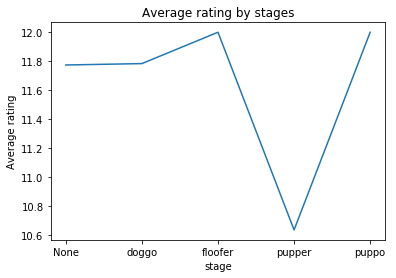

In [72]:
plt.plot(twitter_archive_master.groupby('stages').mean().rating_numerator);
plt.title('Average rating by stages');
plt.xlabel('stage');
plt.ylabel('Average rating');
plt.savefig('average_rating.png')
